# **Intial Preparation of Data and Data Cleaning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F_effective_cell_throughput.csv')

In [3]:
df.head()

,id,celltype,cuid,ecgi,fci,fileid,min5_effective_dl_cell_throughput,min5_effective_dl_cell_throughput_per_qci,min5_effective_ul_cell_throughput,min5_effective_ul_cell_throughput_per_qci,...,spare1,spare2,starttime,stoptime,total_cell_pdcp_dl_volume_qci,total_cell_pdcp_ul_volume_qci,vduname,vnfdid,vnflogicalid,vnftype
0,"6,023,785",Macro,2,2708756710728449,19,95cea6193407783308794bc34d79b472,-,-,-,-,...,0,0,"Jan 31, 2022 @ 23:55:00.000","Feb 1, 2022 @ 00:00:00.000",0,0,0,0,2,DU
1,"6,023,786",Macro,2,2708756710728449,19,95cea6193407783308794bc34d79b472,-,-,-,-,...,0,0,"Jan 31, 2022 @ 23:55:00.000","Feb 1, 2022 @ 00:00:00.000",0,0,0,0,2,DU
2,"6,023,787",Macro,2,2708756710728449,19,95cea6193407783308794bc34d79b472,-,-,-,-,...,0,0,"Jan 31, 2022 @ 23:55:00.000","Feb 1, 2022 @ 00:00:00.000",0,0,0,0,2,DU
3,"6,023,788",Macro,2,2708756710728449,19,95cea6193407783308794bc34d79b472,-,-,-,-,...,0,0,"Jan 31, 2022 @ 23:55:00.000","Feb 1, 2022 @ 00:00:00.000",0,0,0,0,2,DU
4,"6,023,789",Macro,2,2708756710728449,19,95cea6193407783308794bc34d79b472,-,-,-,-,...,0,0,"Jan 31, 2022 @ 23:55:00.000","Feb 1, 2022 @ 00:00:00.000",0,0,0,0,2,DU


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# dataframe without (w/o) meta data
df_wo_meta=df[['starttime','ecgi','min5_effective_dl_cell_throughput_per_qci', 'min5_effective_ul_cell_throughput_per_qci', 'total_cell_pdcp_dl_volume_qci', 'total_cell_pdcp_ul_volume_qci']]

In [6]:
df_wo_meta.head()

,starttime,ecgi,min5_effective_dl_cell_throughput_per_qci,min5_effective_ul_cell_throughput_per_qci,total_cell_pdcp_dl_volume_qci,total_cell_pdcp_ul_volume_qci
0,"Jan 31, 2022 @ 23:55:00.000",2708756710728449,-,-,0,0
1,"Jan 31, 2022 @ 23:55:00.000",2708756710728449,-,-,0,0
2,"Jan 31, 2022 @ 23:55:00.000",2708756710728449,-,-,0,0
3,"Jan 31, 2022 @ 23:55:00.000",2708756710728449,-,-,0,0
4,"Jan 31, 2022 @ 23:55:00.000",2708756710728449,-,-,0,0


In [7]:
print(df_wo_meta.dtypes)

starttime                                    object
ecgi                                          int64
min5_effective_dl_cell_throughput_per_qci    object
min5_effective_ul_cell_throughput_per_qci    object
total_cell_pdcp_dl_volume_qci                object
total_cell_pdcp_ul_volume_qci                object
dtype: object


In [8]:
# ECGI is the name of a cell, therefore it should be considered a category not a number
# starttime should be considered in date/time format

df_wo_meta['ecgi']=df_wo_meta['ecgi'].astype('category')

#df_wo_meta['starttime']=pd.to_datetime(df_wo_meta['starttime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#df_wo_meta['starttime']=pd.to_datetime(df_wo_meta['starttime'])

In [10]:
df_wo_meta.describe()

,starttime,ecgi,min5_effective_dl_cell_throughput_per_qci,min5_effective_ul_cell_throughput_per_qci,total_cell_pdcp_dl_volume_qci,total_cell_pdcp_ul_volume_qci
count,46159,46159,46159,46159,46159,46159
unique,513,9,791,795,773,776
top,"Jan 31, 2022 @ 23:55:00.000",2708756710728193,-,-,0,0
freq,90,5130,44226,44282,45361,45355


In [11]:
df_wo_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   starttime                                  46159 non-null  object  
 1   ecgi                                       46159 non-null  category
 2   min5_effective_dl_cell_throughput_per_qci  46159 non-null  object  
 3   min5_effective_ul_cell_throughput_per_qci  46159 non-null  object  
 4   total_cell_pdcp_dl_volume_qci              46159 non-null  object  
 5   total_cell_pdcp_ul_volume_qci              46159 non-null  object  
dtypes: category(1), object(5)
memory usage: 1.8+ MB


# **Exploratory Data Analysis (EDA)**

### min5_effective_dl_cell_throughput_per_qci Histogram

In [ ]:
df_wo_meta['min5_effective_dl_cell_throughput_per_qci'].value_counts()

-             44226
0              1135
166.667          10
5,000             1
10,220.394        1
19,470.338        1
5,194.656         1
21,535.111        1
5,798.819         1
15,272.349        1
14,288.784        1
267.442           1
20,202.291        1
10,653.767        1
17,760.592        1
24,095            1
9,528.957         1
11,030.649        1
12,843.744        1
14,544.653        1
15,934.356        1
20,100.506        1
13,134.604        1
16,682.846        1
30,521.36         1
26,785.49         1
24,685.578        1
23,585.883        1
23,441.201        1
22,953.902        1
111.111           1
31,305.178        1
36,972.883        1
32,840.926        1
17.241            1
38,701.777        1
47.619            1
42,628.73         1
35,533.64         1
37,639.254        1
39,347.08         1
11,758.919        1
35,690.156        1
42,343.914        1
39,863.08         1
14,869.009        1
40,388.434        1
40,865.18         1
26,627.287        1
21,929.303        1


In [ ]:
df2 = df_wo_meta[['min5_effective_dl_cell_throughput_per_qci']].copy()

In [ ]:
df2.head(30)

,min5_effective_dl_cell_throughput_per_qci
0,-
1,-
2,-
3,-
4,-
5,-
6,-
7,-
8,-
9,-


In [ ]:
df3 = df2[df2.min5_effective_dl_cell_throughput_per_qci != '-']

In [ ]:
# df3 is without -'s and index not reset
df3.head(10)

,min5_effective_dl_cell_throughput_per_qci
25,0
29,"12,166.708"
35,0
39,"14,655.139"
95,0
99,"22,552.127"
175,0
179,"11,379.154"
185,0
189,"27,055.9"


In [ ]:
# df4 is without 0's and index not reset still
df4 = df3[df3.min5_effective_dl_cell_throughput_per_qci != '0']

In [ ]:
df4.head(10)

,min5_effective_dl_cell_throughput_per_qci
29,"12,166.708"
39,"14,655.139"
99,"22,552.127"
179,"11,379.154"
189,"27,055.9"
244,"12,706.527"
309,"27,049.887"
359,"15,323.295"
399,"13,518.115"
449,"16,740.98"


In [ ]:
values_DL_TP = df4['min5_effective_dl_cell_throughput_per_qci'].value_counts(dropna=False).keys().tolist()
counts_DL_TP = df4['min5_effective_dl_cell_throughput_per_qci'].value_counts(dropna=False).tolist()
value_dict_DL_TP = dict(zip(values_DL_TP, counts_DL_TP))

In [ ]:
value_dict_DL_TP

{'1,022.222': 1,
 '1,023.256': 1,
 '1,050.378': 1,
 '1,105.761': 1,
 '1,107.111': 1,
 '1,150.498': 1,
 '1,154.255': 1,
 '1,174.464': 1,
 '1,193.555': 1,
 '1,316.414': 1,
 '1,354.976': 1,
 '1,378.378': 1,
 '1,380.448': 1,
 '1,389.241': 1,
 '1,437.5': 1,
 '1,518.399': 1,
 '1,520.031': 1,
 '1,606.77': 1,
 '1,720.672': 1,
 '1,751.132': 1,
 '1,845.7': 1,
 '1,868.247': 1,
 '1,888.889': 1,
 '1,947.103': 1,
 '1,971.476': 1,
 '10,022.528': 1,
 '10,034.612': 1,
 '10,126.729': 1,
 '10,140.238': 1,
 '10,173.301': 1,
 '10,220.394': 1,
 '10,246.115': 1,
 '10,281.776': 1,
 '10,334.803': 1,
 '10,335.613': 1,
 '10,348.865': 1,
 '10,373.095': 1,
 '10,411.551': 1,
 '10,417.713': 1,
 '10,433.429': 1,
 '10,439.517': 1,
 '10,474.771': 1,
 '10,485.656': 1,
 '10,494.696': 1,
 '10,523.67': 1,
 '10,540.878': 1,
 '10,556.95': 1,
 '10,604.064': 1,
 '10,606.35': 1,
 '10,606.49': 1,
 '10,642.169': 1,
 '10,653.767': 1,
 '10,666.861': 1,
 '10,759.36': 1,
 '10,768.017': 1,
 '10,821.413': 1,
 '10,825.701': 1,
 '10,851.

In [ ]:
#D = {u'Label1':26, u'Label2': 17, u'Label3':30}

#plt.bar(range(len(value_dict_DL_TP)), list(value_dict_DL_TP.values()), align='center')
#plt.xticks(range(len(value_dict_DL_TP)), list(value_dict_DL_TP.values()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

#plt.show() 

#value_dict_DL_TP


In [ ]:
#data = [35, 21, 29, 39, 11]
#colors = sns.color_palette('pastel')
#plt.pie(data, colors = colors)
#plt.show()


#names = list(value_dict_DL_TP.keys())
#values = list(value_dict_DL_TP.values()) 

# define Seaborn color palette to use
#palette_color = sns.color_palette('pastel')
  
# plotting data on chart
#plt.plot(value_dict_DL_TP.values(), labels=value_dict_DL_TP.keys(), colors=palette_color, autopct='%.0f%%')
  
# displaying chart
#plt.show()

In [ ]:
#plt.plot(value_dict_DL_TP.values(), value_dict_DL_TP.keys())

In [ ]:
#st=[]
#for i in df2['min5_effective_dl_cell_throughput_per_qci'].values:
 # i=str(i)
  #i=i.replace('-',' ')
  #st.append(i)

In [ ]:
ones_in_DL_TP = [] 
else_in_DL_TP = []
for key, value in value_dict_DL_TP.items():
  if value == 1:
    ones_in_DL_TP.append(value_dict_DL_TP.keys())
  else:
    else_in_DL_TP.append(value_dict_DL_TP.keys())



In [ ]:
#ones_in_DL_TP

In [ ]:
type(else_in_DL_TP)

list

TypeError: ignored

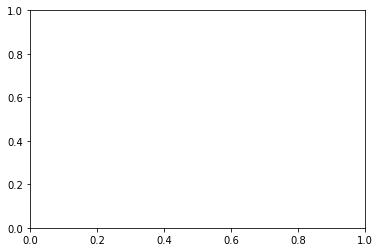

In [ ]:
for i in ones_in_DL_TP:
  plt.plot(i, color='magenta', marker='o',mfc='pink' )

plt.show()

TypeError: ignored

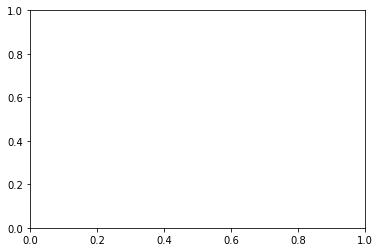

In [ ]:
plt.plot(ones_in_DL_TP, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(ones_in_DL_TP)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('data') #set the label for y axis
plt.xlabel('index') #set the label for x-axis
plt.title("Plotting a list") #set the title of the graph
plt.show() #display the graph

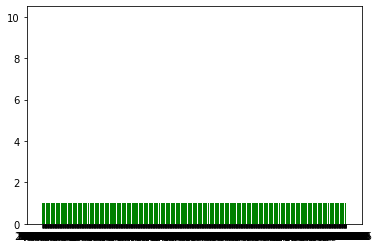

In [ ]:
fig=plt.bar(list(value_dict_DL_TP.keys()), value_dict_DL_TP.values(), color='g')
plt.show()

44226

In [ ]:
values_rsrp = df_wo_meta['rsrp'].value_counts(dropna=False).keys().tolist()
counts_rsrp = df_wo_meta['rsrp'].value_counts(dropna=False).tolist()
value_dict_rsrp = dict(zip(values_rsrp, counts_rsrp))

In [ ]:
value_dict_rsrp

{-101: 1,
 -100: 11,
 -99: 37,
 -98: 58,
 -97: 121,
 -96: 398,
 -95: 732,
 -94: 636,
 -93: 886,
 -92: 1415,
 -91: 1849,
 -90: 1564,
 -89: 1985,
 -88: 2917,
 -87: 2377,
 -86: 1789,
 -85: 1647,
 -84: 1477,
 -83: 1341,
 -82: 1325,
 -81: 1206,
 -80: 969,
 -79: 772,
 -78: 514,
 -77: 303,
 -76: 167,
 -75: 119,
 -74: 81,
 -73: 42,
 -72: 30,
 -71: 11,
 -70: 16,
 -69: 7,
 -68: 8,
 -67: 3,
 -66: 3,
 -65: 3,
 -64: 10,
 -63: 15,
 -62: 22,
 -61: 46,
 -60: 40,
 -59: 42,
 -58: 30,
 -57: 11,
 -56: 9,
 -55: 6,
 -54: 3,
 -53: 6,
 -52: 28,
 -51: 9,
 -50: 16,
 -49: 3}

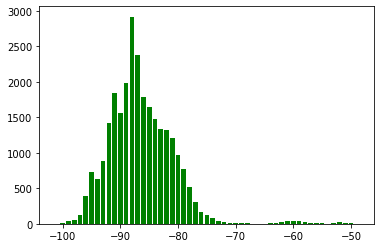

In [ ]:
fig=plt.bar(list(value_dict_rsrp.keys()), value_dict_rsrp.values(), color='g')
plt.show()

In [ ]:
fig.set_title('Amount Frequency')
fig.set_xlabel('Amount ($)')
fig.set_ylabel('Frequency')
fig.set_xticklabels(x_labels)

AttributeError: ignored

### RSRQ Histogram

### RSSI Histogram

### SINR Histogram

### Longitude and Latitude Scatterplot

Trying to see if there's a trend in the way the boat moves

In [ ]:
df_wo_meta['longitude'].value_counts()

-2.815    1265
-2.789    1232
-2.842    1134
-2.762    1098
-2.841    1044
          ... 
-2.848       6
-2.618       6
-2.825       6
-2.790       4
-2.793       4
Name: longitude, Length: 215, dtype: int64

In [ ]:
df_wo_meta['latitude'].value_counts()

58.106    1975
58.227    1913
58.197    1628
58.072    1464
58.105    1150
          ... 
58.098       6
58.165       6
58.080       6
58.075       6
58.150       6
Name: latitude, Length: 210, dtype: int64

In [ ]:
values = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).keys().tolist()
counts = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))